<a href="https://colab.research.google.com/github/mikoesnim0/DigitalCPATH-research/blob/main/FollicularNeoplasmPredict_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'follicular-adenoma-sample:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4753470%2F8058941%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240419%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240419T155825Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D26326da3b2d81cf89246516b0a779131f3ab02f0de081c95097c6d5d3cd1b701704429245c3025a01620133b382c477a978f599330ee3daea3ca3a62b6865bcb2d7d705ce5dbaed13abd072e8fbd931780ebe37b01f7fdf2c68b351f294beb515c7c2d6e27fffbca73e9649fd815da5adf7c42e26b49f028ac98d2f0934f898afff651e114aa5dbbbac232c5fd0b7213d3ab74c6440847721e86231d99ebcc0227942d9f59447f4cb4d8e414f15319347ba12cc35ccf31286d9b88ec292ab11afa1c1d9d96668447e89c96f2a8be3c21bbfbf71097c98ff761cabaf9a69c2aaaa19664f46051e10a0c92e39735b60a212fbb20e987ca5bc43df3447e0403de5c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname))
        break


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#whether to see if file is all-right

In [ ]:
!pip install pyvips -f /kaggle/input/pyvips-python-and-deb-package-gpu/python_packages/ --no-index
!pip list | grep pyvips

Looking in links: /kaggle/input/pyvips-python-and-deb-package-gpu/python_packages/
ERROR: Could not find a version that satisfies the requirement pyvips (from versions: none)
ERROR: No matching distribution found for pyvips


In [ ]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm

from sklearn.metrics import balanced_accuracy_score

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler

label_names = ['True', 'False']
# num_classes = len(label_names)
# label_dict = {label_names[i]: i for i in range(len(label_names))}
# num_classes = 2
# labels = [0, 1]
# label_dict = {labels[i]: i for i in range(len(labels))}
in_dim = 384
seed = 42
# apply_focal = False


In [ ]:

def ensure_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def seed_everything(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    # random.seed(seed)
    # np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.backends.cudnn.deterministic = True
seed_everything(seed)

In [ ]:
#LabelSmoothing CrossEntropy
class LabelSmoothingCrossEntropy(nn.Module):
    def __init__(self, smoothing=0.1):
        super(LabelSmoothingCrossEntropy, self).__init__()
        self.smoothing = smoothing

    def forward(self, input, target):
        log_probs = F.log_softmax(input, dim=-1)

        # 创建一个与真实标签相同大小的张量，其中包含每个类别的平滑标签
        confidence = 1.0 - self.smoothing
        with torch.no_grad():
            true_dist = torch.zeros_like(log_probs)
            true_dist.fill_(self.smoothing / (input.size(1) - 1))
            true_dist.scatter_(1, target.data.unsqueeze(1), confidence)

        # 计算交叉熵
        loss = (-true_dist * log_probs).sum(dim=-1).mean()
        return loss

label_smooth = LabelSmoothingCrossEntropy(0.1)

class FocalLoss(nn.Module):
    '''Multi-class Focal loss implementation'''

    def __init__(self, gamma=2, weight=None, ignore_index=-100):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.weight = weight
        self.ignore_index = ignore_index

    def forward(self, input, target):
        """
        :param input: torch.Tensor, shape=[N, C]
        :param target: torch.Tensor, shape=[N, ]
        """
        logpt = F.log_softmax(input, dim=1)
        pt = torch.exp(logpt)
        logpt = (1 - pt) ** self.gamma * logpt
        loss = F.nll_loss(logpt, target, self.weight, ignore_index=self.ignore_index)
        return loss

focal_loss = FocalLoss()

In [ ]:
# 1 Dataset and transform
class WSIFeatDataset(Dataset):
    def __init__(self, data_csv: pd.DataFrame, feature_dir: str, ratio, phase: int):
        super().__init__()
        self.data_csv = data_csv
        self.feature_dir = feature_dir
        self.ratio = ratio
        assert phase in [0, 1]
        self.phase = phase

    def __len__(self):
        return len(self.data_csv)

    def __getitem__(self, idx):
        sample = self.data_csv.iloc[idx]
        file_name = str(sample['image_id'])

        features = torch.load(os.path.join(self.feature_dir, file_name + '.pt'), map_location='cpu')
        random.shuffle(features)
        if isinstance(self.ratio, float):
            features = features[:int(len(features) * self.ratio)]
        elif isinstance(self.ratio, int):
            features = features[:min(len(features), self.ratio)]

        if self.phase == 0:
            label = torch.tensor(label_dict[sample['label']])
            return file_name, features, label
        else:
            return file_name, features


In [ ]:
class ImageDataset(Dataset):
    """Dataset of PNG images."""

    def __init__(self,
                 root_dir: Union[str, Path],
                 transform: Optional[Callable] = None) -> None:
        self.root_dir = root_dir
        self.transform = transform
        self.__build()

    def __build(self) -> None:
        self._paths = list(Path(self.root_dir).rglob('*.png'))

    def __len__(self) -> int:
        return len(self._paths)

    def __getitem__(self, idx: int) -> Union[ImageCls, torch.Tensor]:
        img = Image.open(self._paths[idx])
        if self.transform is not None:
            return self.transform(img)
        else:
            return img


In [ ]:

# 2 Model
class ABMIL(nn.Module):
    def __init__(self, in_dim, feat_dim, attn_dim, num_classes):
        super().__init__()
        self.downlinear = nn.Sequential(nn.Linear(in_dim, feat_dim), nn.ReLU())
        self.attention_V = nn.Sequential(nn.Linear(feat_dim, attn_dim), nn.Tanh())
        self.attention_U = nn.Sequential(nn.Linear(feat_dim, attn_dim), nn.Sigmoid())
        self.attention_weights = nn.Linear(attn_dim, 1)
        self.classifier = nn.Linear(feat_dim, num_classes)

        self.apply(self._init_weights)

    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            nn.init.normal_(m.weight, std=.02)
            if isinstance(m, nn.Linear) and m.bias is not None:
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.downlinear(x)

        A_V = self.attention_V(x)
        A_U = self.attention_U(x)
        A = self.attention_weights(A_V * A_U)
        A = torch.transpose(A, 1, 0)
        A = torch.softmax(A, dim=1)
        x = torch.mm(A, x)

        scores = self.classifier(x)

        return scores


class FCLayer(nn.Module):
    def __init__(self, in_size, out_size=1):
        super(FCLayer, self).__init__()
        self.fc = nn.Sequential(nn.Linear(in_size, out_size))

    def forward(self, feats):
        x = self.fc(feats)
        return feats, x


class IClassifier(nn.Module):
    def __init__(self, feature_size, output_class):
        super(IClassifier, self).__init__()

        self.fc = nn.Linear(feature_size, output_class)

    def forward(self, feats):
        c = self.fc(feats.view(feats.shape[0], -1))  # N x C
        return feats.view(feats.shape[0], -1), c


class BClassifier(nn.Module):
    def __init__(self, input_size, output_class, dropout_v=0.0, nonlinear=True, passing_v=False):  # K, L, N
        super(BClassifier, self).__init__()
        if nonlinear:
            self.q = nn.Sequential(nn.Linear(input_size, 128), nn.ReLU(), nn.Linear(128, 128), nn.Tanh())
        else:
            self.q = nn.Linear(input_size, 128)
        if passing_v:
            self.v = nn.Sequential(
                nn.Dropout(dropout_v),
                nn.Linear(input_size, input_size),
                nn.ReLU()
            )
        else:
            self.v = nn.Identity()

        ### 1D convolutional layer that can handle multiple class (including binary)
        self.fcc = nn.Conv1d(output_class, output_class, kernel_size=input_size)

    def forward(self, feats, c):  # N x K, N x C
        device = feats.device
        V = self.v(feats)  # N x V, unsorted
        Q = self.q(feats).view(feats.shape[0], -1)  # N x Q, unsorted

        # handle multiple classes without for loop
        _, m_indices = torch.sort(c, 0, descending=True)  # sort class scores along the instance dimension, m_indices in shape N x C
        m_feats = torch.index_select(feats, dim=0, index=m_indices[0, :])  # select critical instances, m_feats in shape C x K
        q_max = self.q(m_feats)  # compute queries of critical instances, q_max in shape C x Q
        A = torch.mm(Q, q_max.transpose(0, 1))  # compute inner product of Q to each entry of q_max, A in shape N x C, each column contains unnormalized attention scores
        A = F.softmax(A / torch.sqrt(torch.tensor(Q.shape[1], dtype=torch.float32, device=device)), 0)  # normalize attention scores, A in shape N x C,
        B = torch.mm(A.transpose(0, 1), V)  # compute bag representation, B in shape C x V

        B = B.view(1, B.shape[0], B.shape[1])  # 1 x C x V
        C = self.fcc(B)  # 1 x C x 1
        C = C.view(1, -1)
        return C, A, B


class MILNet(nn.Module):
    def __init__(self, i_classifier, b_classifier):
        super(MILNet, self).__init__()
        self.i_classifier = i_classifier
        self.b_classifier = b_classifier

    def forward(self, x):
        feats, classes = self.i_classifier(x)
        prediction_bag, A, B = self.b_classifier(feats, classes)

        return classes, prediction_bag, A, B


class DSMIL(nn.Module):
    def __init__(self, i_classifier, b_classifier):
        super(DSMIL, self).__init__()
        self.i_classifier = i_classifier
        self.b_classifier = b_classifier

    def forward(self, x):
        feats, classes = self.i_classifier(x)
        prediction_bag, A, B = self.b_classifier(feats, classes)

        return classes, prediction_bag, A, B

!pip install /kaggle/input/einops-030/einops-0.3.0-py2.py3-none-any.whl
from einops import rearrange, reduce
from torch import einsum
from math import ceil


def exists(val):
    return val is not None


def moore_penrose_iter_pinv(x, iters=6):
    device = x.device

    abs_x = torch.abs(x)
    col = abs_x.sum(dim=-1)
    row = abs_x.sum(dim=-2)
    z = rearrange(x, '... i j -> ... j i') / (torch.max(col) * torch.max(row))

    I = torch.eye(x.shape[-1], device=device)
    I = rearrange(I, 'i j -> () i j')

    for _ in range(iters):
        xz = x @ z
        z = 0.25 * z @ (13 * I - (xz @ (15 * I - (xz @ (7 * I - xz)))))

    return z


class NystromAttention(nn.Module):
    def __init__(
            self,
            dim,
            dim_head=64,
            heads=8,
            num_landmarks=256,
            pinv_iterations=6,
            residual=True,
            residual_conv_kernel=33,
            eps=1e-8,
            dropout=0.
    ):
        super().__init__()
        self.eps = eps
        inner_dim = heads * dim_head

        self.num_landmarks = num_landmarks
        self.pinv_iterations = pinv_iterations

        self.heads = heads
        self.scale = dim_head ** -0.5
        self.to_qkv = nn.Linear(dim, inner_dim * 3, bias=False)

        self.to_out = nn.Sequential(
            nn.Linear(inner_dim, dim),
            nn.Dropout(dropout)
        )

        self.residual = residual
        if residual:
            kernel_size = residual_conv_kernel
            padding = residual_conv_kernel // 2
            self.res_conv = nn.Conv2d(heads, heads, (kernel_size, 1), padding=(padding, 0), groups=heads, bias=False)

    def forward(self, x, mask=None, return_attn=False):
        b, n, _, h, m, iters, eps = *x.shape, self.heads, self.num_landmarks, self.pinv_iterations, self.eps

        # pad so that sequence can be evenly divided into m landmarks

        remainder = n % m
        if remainder > 0:
            padding = m - (n % m)
            x = F.pad(x, (0, 0, padding, 0), value=0)

            if exists(mask):
                mask = F.pad(mask, (padding, 0), value=False)

        # derive query, keys, values

        q, k, v = self.to_qkv(x).chunk(3, dim=-1)
        q, k, v = map(lambda t: rearrange(t, 'b n (h d) -> b h n d', h=h), (q, k, v))

        # set masked positions to 0 in queries, keys, values

        if exists(mask):
            mask = rearrange(mask, 'b n -> b () n')
            q, k, v = map(lambda t: t * mask[..., None], (q, k, v))

        q = q * self.scale

        # generate landmarks by sum reduction, and then calculate mean using the mask

        l = ceil(n / m)
        landmark_einops_eq = '... (n l) d -> ... n d'
        q_landmarks = reduce(q, landmark_einops_eq, 'sum', l=l)
        k_landmarks = reduce(k, landmark_einops_eq, 'sum', l=l)

        # calculate landmark mask, and also get sum of non-masked elements in preparation for masked mean

        divisor = l
        if exists(mask):
            mask_landmarks_sum = reduce(mask, '... (n l) -> ... n', 'sum', l=l)
            divisor = mask_landmarks_sum[..., None] + eps
            mask_landmarks = mask_landmarks_sum > 0

        # masked mean (if mask exists)

        q_landmarks /= divisor
        k_landmarks /= divisor

        # similarities

        einops_eq = '... i d, ... j d -> ... i j'
        sim1 = einsum(einops_eq, q, k_landmarks)
        sim2 = einsum(einops_eq, q_landmarks, k_landmarks)
        sim3 = einsum(einops_eq, q_landmarks, k)

        # masking

        if exists(mask):
            mask_value = -torch.finfo(q.dtype).max
            sim1.masked_fill_(~(mask[..., None] * mask_landmarks[..., None, :]), mask_value)
            sim2.masked_fill_(~(mask_landmarks[..., None] * mask_landmarks[..., None, :]), mask_value)
            sim3.masked_fill_(~(mask_landmarks[..., None] * mask[..., None, :]), mask_value)

        # eq (15) in the paper and aggregate values

        attn1, attn2, attn3 = map(lambda t: t.softmax(dim=-1), (sim1, sim2, sim3))
        attn2_inv = moore_penrose_iter_pinv(attn2, iters)

        out = (attn1 @ attn2_inv) @ (attn3 @ v)

        # add depth-wise conv residual of values

        if self.residual:
            out += self.res_conv(v)

        # merge and combine heads

        out = rearrange(out, 'b h n d -> b n (h d)', h=h)
        out = self.to_out(out)
        out = out[:, -n:]

        if return_attn:
            attn = attn1 @ attn2_inv @ attn3
            return out, attn

        return out


class TransLayer(nn.Module):
    def __init__(self, norm_layer=nn.LayerNorm, dim=512):
        super().__init__()
        self.norm = norm_layer(dim)
        self.attn = NystromAttention(
            dim=dim,
            dim_head=dim // 8,
            heads=8,
            num_landmarks=dim // 2,  # number of landmarks
            pinv_iterations=6,  # number of moore-penrose iterations for approximating pinverse. 6 was recommended by the paper
            residual=True,  # whether to do an extra residual with the value or not. supposedly faster convergence if turned on
            dropout=0.1
        )

    def forward(self, x):
        x = x + self.attn(self.norm(x))

        return x


class PPEG(nn.Module):
    def __init__(self, dim=512):
        super(PPEG, self).__init__()
        self.proj = nn.Conv2d(dim, dim, 7, 1, 7 // 2, groups=dim)
        self.proj1 = nn.Conv2d(dim, dim, 5, 1, 5 // 2, groups=dim)
        self.proj2 = nn.Conv2d(dim, dim, 3, 1, 3 // 2, groups=dim)

    def forward(self, x, H, W):
        B, _, C = x.shape
        cls_token, feat_token = x[:, 0], x[:, 1:]
        cnn_feat = feat_token.transpose(1, 2).view(B, C, H, W)
        x = self.proj(cnn_feat) + cnn_feat + self.proj1(cnn_feat) + self.proj2(cnn_feat)
        x = x.flatten(2).transpose(1, 2)
        x = torch.cat((cls_token.unsqueeze(1), x), dim=1)
        return x


class TransMIL(nn.Module):
    def __init__(self, in_dim, n_classes):
        super(TransMIL, self).__init__()
        self.pos_layer = PPEG(dim=512)
        self._fc1 = nn.Sequential(nn.Linear(in_dim, 512), nn.ReLU())
        self.cls_token = nn.Parameter(torch.randn(1, 1, 512))
        self.n_classes = n_classes
        self.layer1 = TransLayer(dim=512)
        self.layer2 = TransLayer(dim=512)
        self.norm = nn.LayerNorm(512)
        self._fc2 = nn.Linear(512, self.n_classes)

    def forward(self, h):
        h = h.float()  # [B, n, 1024]

        h = self._fc1(h)  # [B, n, 512]

        # ---->pad
        H = h.shape[1]
        _H, _W = int(np.ceil(np.sqrt(H))), int(np.ceil(np.sqrt(H)))
        add_length = _H * _W - H
        h = torch.cat([h, h[:, :add_length, :]], dim=1)  # [B, N, 512]

        # ---->cls_token
        B = h.shape[0]
        cls_tokens = self.cls_token.expand(B, -1, -1).to(h.device)
        h = torch.cat((cls_tokens, h), dim=1)

        # ---->Translayer x1
        h = self.layer1(h)  # [B, N, 512]

        # ---->PPEG
        h = self.pos_layer(h, _H, _W)  # [B, N, 512]

        # ---->Translayer x2
        h = self.layer2(h)  # [B, N, 512]

        # ---->cls_token
        h = self.norm(h)[:, 0]

        # ---->predict
        logits = self._fc2(h)  # [B, n_classes]

        return logits


In [ ]:
# 0 Raw data loading
train_csv = pd.read_csv(os.path.join('/kaggle/input/202312-ubc/', 'train_revised_extra.csv'))
EC = train_csv[train_csv['label'].isin(['EC','CC'])]
other = train_csv[train_csv['label'].isin(['LGSC','MC','Other'])]
# Do upsample
train_csv = pd.concat([train_csv] + [EC] * 3 + [other] * 5).sample(frac=1.0)
print(train_csv['label'].value_counts())
from sklearn.model_selection import StratifiedKFold
train_csv['tag'] = train_csv['label'] + '_' + train_csv['is_tma'].astype(str)

# skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=seed)
# for i, (_, val_index) in enumerate(skf.split(train_csv, train_csv['tag'])):
#     train_csv.loc[val_index, "fold"] = i



def train_fold(fold=0, model_type=16, mil_type='abmil', ratio=0.3, epochs = 21, test = True):
    TASK = f'UBC_fold_{fold}, model_type_{model_type}, mil_type_{mil_type},ratio_{ratio}'
    print(f"====={TASK}=======")
    if test:
        train_data = train_csv[train_csv["fold"] != fold]
        val_data = train_csv[train_csv["fold"] == fold]
    else:
        fold='all'
        train_data = train_csv
        val_data = train_csv
    print(train_data['label'].value_counts())
    print(val_data['label'].value_counts())
    accumulate = True
    feature_dir = f'/kaggle/input/ubc-ocean-vit-p{model_type}-wsi-features'
    mil_model_name = f'wsi_vitp{model_type}_{mil_type}_{ratio}_{epochs}ep'
    device = torch.device('cuda:0')
    output_dir = f'./ckpt/{mil_type}_patch{model_type}/'
    ensure_dir(output_dir)
    # 3 Training
    train_dataset = WSIFeatDataset(train_data, feature_dir, ratio, 0) if test else WSIFeatDataset(train_csv, feature_dir, ratio, 0)
    train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True, num_workers=4, pin_memory=True)
    val_dataset = WSIFeatDataset(val_data, feature_dir, ratio, 0)
    val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False, num_workers=4, pin_memory=True)

    if mil_type == 'abmil':
        model = ABMIL(in_dim, 512, 128, num_classes)
    elif mil_type == 'transmil':
        model = TransMIL(384, num_classes)
    else:
        model = MILNet(IClassifier(in_dim, num_classes), BClassifier(in_dim, num_classes))

    optimizer = optim.Adam(model.parameters(), 5e-4, weight_decay=5e-4)
    scheduler = lr_scheduler.CosineAnnealingLR(optimizer, epochs, 5e-5)

    model = model.to(device)

    max_acc = 0.6
    balanced_acc = 0.
    for epoch in range(1, epochs+1):
        loss_sum = 0.
        n = 0
        loop = tqdm(train_loader, total=len(train_loader))
        model.train()
        for file_name, features, label in loop:
            label = label.to(device)
            features = features.squeeze(0).to(device)

            if mil_type in ['abmil']:
                scores = model(features)
                if apply_focal:
                    loss = focal_loss(scores, label)
                else:
                    loss = F.cross_entropy(scores, label)
                    # loss = label_smooth(scores, label)
            elif mil_type == 'transmil':
                scores = model(features.unsqueeze(0))
                if apply_focal:
                    loss = focal_loss(scores, label)
                else:
                    loss = F.cross_entropy(scores, label)
                    # loss = label_smooth(scores, label)
            else:
                classes, bag_prediction, _, _ = model(features)
                max_prediction, index = torch.max(classes, 0, True)
                if apply_focal:
                    loss_bag = focal_loss(bag_prediction, label)
                    loss_max = focal_loss(max_prediction.view(1, -1), label)
                    loss = 0.5 * loss_bag + 0.5 * loss_max
                else:
                    loss_bag = F.cross_entropy(bag_prediction, label)
                    loss_max = F.cross_entropy(max_prediction.view(1, -1), label)
                    # loss_bag = label_smooth(bag_prediction, label)
                    # loss_max = label_smooth(max_prediction.view(1, -1), label)
                    loss = 0.5 * loss_bag + 0.5 * loss_max

            if accumulate:
                loss = loss / 4
                loss.backward(retain_graph=True)
                if (n + 1) % 4 == 0 or (n + 1) == len(train_loader):
                    optimizer.step()
                    optimizer.zero_grad()
            else:
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            n += 1
            loss_sum += loss.item()

            loop.set_description(f'Train [{epoch}/{epochs}]')
            loop.set_postfix(loss=loss.item(), loss_mean=loss_sum / n)

        if test:
            with torch.no_grad():
                acc = 0
                loss_val = 0
                y_true = []
                y_pred = []

                loop = tqdm(val_loader, total=len(val_loader))
                model.eval()
                for file_name, features, label in loop:
                    label = label.to(device)
                    features = features.squeeze(0).to(device)

                    if mil_type in ['abmil']:
                        scores = model(features)
                    elif mil_type == 'transmil':
                        scores = model(features.unsqueeze(0))
                    else:
                        classes, bag_prediction, _, _ = model(features)
                        max_prediction, index = torch.max(classes, 0, True)
                        scores = 0.5 * torch.softmax(max_prediction, 1) + 0.5 * torch.softmax(bag_prediction, 1)

                    pred = torch.argmax(scores)

                    y_pred.append(pred.item())
                    y_true.append(label.item())

                    if pred == label.squeeze(0):
                        acc += 1

                    loop.set_description(f'Val [{epoch}/{epochs}]')
                    loop.set_postfix(acc=acc / len(val_loader), max_acc=max_acc, balanced_acc=balanced_acc)

                if acc / len(val_loader) > max_acc:
                    max_acc = acc / len(val_loader)
                y_true = np.array(y_true)
                y_pred = np.array(y_pred)
                if balanced_accuracy_score(y_true, y_pred) > balanced_acc:
                    balanced_acc = balanced_accuracy_score(y_true, y_pred)
                    torch.save(model.state_dict(), f"{output_dir}/{mil_model_name}_fold{fold}_{epoch}_val{round(balanced_acc,3)}.pth")

        scheduler.step()

        if not test:
            if epoch > 8 and epoch%3 == 0:
                torch.save(model.state_dict(), f"{output_dir}/{mil_model_name}_fold{fold}_{epoch}.pth")

# # 划分验证集，五折
# for model_type in [8, 16]:
#     for mil_type in ['abmil', 'dsmil']:
#         for label_type in label_names:
#             for fold in range(0, 3):
#                 train_fold(fold=fold, model_type=model_type, mil_type=mil_type, label_type=label_type)

#不划分验证集，全量训练
for model_type in [8, 16]:
    for mil_type in ['abmil', 'dsmil', 'transmil']:
        train_fold(fold='all', model_type=model_type, mil_type=mil_type, ratio=0.5, test = False)

All of the process is about:

1. preprocessing of the images <- been adopted in deeppath code
1. dataset object defining
1. data loader defining
1. train-test split, and training
1. valid data showing

Is the adopted version of https://www.kaggle.com/code/mikoesnim0/cancer-subtype-baseline-with-lightning-timm/edit - Cancer subtype classification notebook.

In [ ]:
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


DATASET_FOLDER = "/kaggle/input/follicular-adenoma-sample"

In [ ]:
%cd "/kaggle/input/follicular-adenoma-sample"
import os
os.listdir()

In [ ]:
import os
import re
import pandas as pd


is_csv = False
csv_path = os.path.join("/kaggle/working/", "train.csv")
if not is_csv:
    df = pd.DataFrame(columns=['ID','is_carcinoma'])
    df.to_csv(csv_path, index = False)
# Assuming `svs_numbers`, `svs_path`, and other necessary variables are defined elsewhere
# Initialize the DataFrame with correct column names if it's not already initialized

for file in os.listdir():
    # Check if the directory name contains a numeric identifier
    match = re.search(r'(\d+)_files', file)
    print(match.group(1))
#     count += 1
#     print(int(match.group(1))-1028000)
    number = int(match.group(1))
    number_mod = number % 1000
    if number_mod < 112:
        is_carcinoma = True
    else:
        is_carcinoma = False

    new_row = pd.DataFrame({'ID': [number], 'is_carcinoma': [is_carcinoma]})
    df = pd.concat([df, new_row], ignore_index = False)

# print(len(os.listdir())-count)

1028034
1028123
1028041
1028031
1028032
1028040
1028035
1028120
1028029
1028124
1028115
1028114
1028043
1028125
1028033
1028130
1028132
1028036
1028111
1028118


In [ ]:
df

,ID,is_carcinoma
0,1028034,True
0,1028123,False
0,1028041,True
0,1028031,True
0,1028032,True
0,1028040,True
0,1028035,True
0,1028120,False
0,1028029,True
0,1028124,False


In [ ]:
df_train = df
# labels = list(df_train["label"].unique())
print(f"Dataset/train size: {len(df_train)}")
display(df_train.head())

Dataset/train size: 20


,ID,is_carcinoma
0,1028034,True
0,1028123,False
0,1028041,True
0,1028031,True
0,1028032,True


In [ ]:
df_train["path_px"] = df_train['ID'].apply(lambda id: f"{id}_files/20.0/*.png")
# df_train["thumbnail_exists"] = df_train['path_thumbnail'].apply(
#     lambda name: os.path.isfile(os.path.join(DATASET_IMAGES, name)))
display(df_train.head())
# df_train = df_train[df_train["thumbnail_exists"] == True]
print(f"size: {len(df_train)}")

,ID,is_carcinoma,path_px
0,1028034,True,1028034_files/20.0/*.png
0,1028123,False,1028123_files/20.0/*.png
0,1028041,True,1028041_files/20.0/*.png
0,1028031,True,1028031_files/20.0/*.png
0,1028032,True,1028032_files/20.0/*.png


size: 20


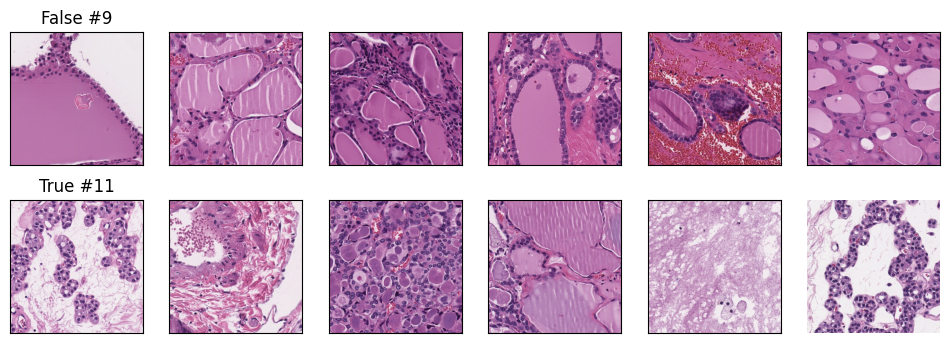

In [ ]:
import matplotlib.pyplot as plt

nb_samples = 6
n, m = len(np.unique(df_train['is_carcinoma'])), nb_samples,
fig, axarr = plt.subplots(nrows=n, ncols=m, figsize=(m * 2, n * 2))
for ilb, (lb, df_) in enumerate(df_train.groupby('is_carcinoma')):
    img_ids = list(df_['ID'])
    for i in range(m):
        img_path = os.path.join(DATASET_FOLDER, f"{img_ids[i]}_files")
        img_path = glob.glob(img_path +'/20.0/*.jpeg')[0]
        img = plt.imread(img_path)
        axarr[ilb, i].imshow(img)
        if i == 0:
            axarr[ilb, i].set_title(f"{lb} #{len(df_)}")
        axarr[ilb, i].set_xticks([])
        axarr[ilb, i].set_yticks([])
_= plt.axis('off')

In [ ]:
def prune_image_rows_cols(img, thr=0.001):
    # delete empty columns
    for l in reversed(range(img.shape[1])):
        if (np.sum(img[:, l]) / float(img.shape[0])) < thr:
            img = np.delete(img, l, 1)
    # delete empty rows
    for l in reversed(range(img.shape[0])):
        if (np.sum(img[l, :]) / float(img.shape[1])) < thr:
            img = np.delete(img, l, 0)
    return img

In [ ]:
import glob
from PIL import Image
from tqdm.auto import tqdm
from joblib import Parallel, delayed

# ! mkdir -p train_thumbnails
# ! rm -f train_thumbnails/*.png

# ls = glob.glob(os.path.join(DATASET_FOLDER, '*.png'))
# print(f"found images: {len(ls)}")

# for p_img in tqdm(ls):
#     prune_scale_image(p_img, "./train_thumbnails")

_= Parallel(n_jobs=4)(
    delayed(prune_scale_image)(p_img, "./train_thumbnails") for p_img in tqdm(ls)
)
ls = glob.glob(os.path.join("./train_thumbnails", '*.png'))
print(f"found images: {len(ls)}")

In [ ]:
#version 3
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class TumorDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []

        for dir_name in os.listdir(root_dir):
            print(f"Found directory: {dir_name}")  # Diagnostic print
            if dir_name.endswith('_files'):
                number_dir_path = os.path.join(root_dir, dir_name)
                dir_path = os.path.join(number_dir_path, '20.0')  # Navigate to the '20.0' subdirectory
                label = 0 if int(dir_name.split('_')[0]) < 1028100 else 1  # Determine label based on directory name
                for img_name in os.listdir(dir_path):
                    if img_name.endswith('.jpeg'):  # Look for .jpeg files
                        img_path = os.path.join(dir_path, img_name)
                        self.samples.append((img_path, label))

        print(f"Total samples loaded: {len(self.samples)}")  # Diagnostic print

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label


In [ ]:
def prune_image_rows_cols(img, thr=0.001):
    # delete empty columns
    for l in reversed(range(img.shape[1])):
        if (np.sum(img[:, l]) / float(img.shape[0])) < thr:
            img = np.delete(img, l, 1)
    # delete empty rows
    for l in reversed(range(img.shape[0])):
        if (np.sum(img[l, :]) / float(img.shape[1])) < thr:
            img = np.delete(img, l, 0)
    return img

In [ ]:
def prune_image(img, thr=0.001):
    #delete empty columns
    for l in reversed(range(img.shape[1])):
        if (np.sum(img[:,l])/float(img.shape[0]))<thr:
            img = np.delete(img, l, 1)
    #delete empty rows
    for l in reversed(range(img.shape[0])):
        if (np.sum(img[l,:])/float(img.shape[1]))<thr:
            img = np.delete(img, l, 1)

In [ ]:
def prune_scale_image(img_path: str, out_dir: str, size: int = 512) -> None:
    img = np.array(Image.open(img_path))
    img = prune_image_rows_cols(img)
    mask = np.sum(img[..., :3], axis=2) == 0
    img[mask, :] = 255
    img = Image.fromarray(img)
    img.thumbnail((size, size))
    img.save(os.path.join(out_dir, os.path.basename(img_path)))

In [ ]:
dataset_img = '/kaggle/input/follicular-adenoma-sample'

In [ ]:
def prune_scale(img_path:str, out_dir:str, size_int=512) -> None:
    img = np.array(Image.open(img_path))
    img = prune_image(img)
    mask = np.sum(img[...,:3], axis=2) ==0
    img[mask,:] = 255
    img = Image.fromarray(img)
    img.thumbnail((size,size))
    img.save(os.path.join(out_dir, os.path.basename(img_path)))

In [ ]:

import glob
from PIL import Image
from tqdm.auto import tqdm
from joblib import Parallel, delayed

! mkdir -p train_thumbnails
! rm -f train_thumbnails/*.png

ls = glob.glob(os.path.join(dataset_img,'20.0' ,'*.jpeg'))
print(f"found images: {len(ls)}")

# for p_img in tqdm(ls):
#     prune_scale_image(p_img, "./train_thumbnails")

# _= Parallel(n_jobs=4)(
#     delayed(prune_scale_image)(p_img, "./train_thumbnails") for p_img in tqdm(ls)
# )
# ls = glob.glob(os.path.join("./train_thumbnails", '*.png'))
# print(f"found images: {len(ls)}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Transformation for displaying images
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize for display purposes
    transforms.ToTensor()
])

# Initialize dataset
dataset = TumorDataset(root_dir='/kaggle/input/follicular-adenoma-sample', transform=transform)


In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images for visualization
    transforms.ToTensor()
])

# Initialize the dataset
dataset = TumorDataset(root_dir='/kaggle/input/follicular-adenoma-sample', transform=transform)


In [ ]:
len(dataset)

In [ ]:

# Function to display images
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img.numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.axis('off')

def show_sample_images(dataset, num_images=6):
    fig = plt.figure(figsize=(15, 6))
    for i in range(num_images):
        idx = np.random.randint(0, len(dataset))
        img, label = dataset[idx]
        label_str = 'Malignant' if label == 0 else 'Benign'
        ax = fig.add_subplot(1, num_images, i + 1, xticks=[], yticks=[])
        imshow(img)
        ax.set_title(label_str)

if len(dataset) > 0:
    show_sample_images(dataset)
else:
    print("No samples loaded, please check the dataset paths and file structure.")


In [ ]:

def imshow(img):
    img = img.numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.axis('off')

def show_sample_images(dataset, num_images=6):
    fig = plt.figure(figsize=(15, 6))
    for i in range(num_images):
        idx = np.random.randint(0, len(dataset))
        img, label = dataset[idx]
        label_str = 'Malignant' if label == 0 else 'Benign'
        ax = fig.add_subplot(1, num_images, i + 1, xticks=[], yticks=[])
        imshow(img)
        ax.set_title(label_str)

show_sample_images(dataset)


# Step 2: Model Design

## 2-1 Simple CNN

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)  # Adjusted for image size after pooling
        self.fc2 = nn.Linear(128, 2)  # Assuming 2 classes

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # All dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


## 2-2 ABMIL - attention based MIL

## 2-3 CLAM - from the paper Have seen

# Step 3: Training

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to simplify the problem
    transforms.ToTensor(),  # Convert images to PyTorch tensors
])

dataset = TumorDataset(root_dir='follicular-adenoma-sample', transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training loop (simplified)
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(dataloader)}")

print('Finished Training')


In [ ]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

class TumorDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []

        for dir_name in os.listdir(root_dir):
            if dir_name.endswith('_files'):
                number_dir_path = os.path.join(root_dir, dir_name)
                dir_path = os.path.join(number_dir_path, '20.0')  # Access the '20.0' subdirectory
                label = 0 if int(dir_name.split('_')[0]) < 1028100 else 1
                for img_name in os.listdir(dir_path):
                    if img_name.endswith('.jpeg'):  # Look specifically for .jpeg files
                        img_path = os.path.join(dir_path, img_name)
                        self.samples.append((img_path, label))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label


In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images for visualization
    transforms.ToTensor()
])

# Initialize the dataset
dataset = TumorDataset(root_dir='/kaggle/input/follicular-adenoma-sample', transform=transform)


# Initialize dataset and dataloader
# dataset = TumorDataset(root_dir='follicular-adenoma-sample', transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)


class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        # Update the input features for fc1 based on the calculation above
        self.fc1 = nn.Linear(64 * 32 * 32, 128)  # Adjusted to the correct size
        self.fc2 = nn.Linear(128, 2)  # Assuming 2 classes: malignant, benign

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 64 * 32 * 32)  # Update this line as well to match the new size
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training loop
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(dataloader)}")

print('Finished Training')


In [ ]:
# Assuming test_loader is defined, similar to dataloader for training
model.eval()  # Set the model to evaluation mode

correct = 0
total = 0
with torch.no_grad():  # For evaluation, we don't need gradient computation
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test dataset: {accuracy:.2f}%')
